# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data set
df = pd.read_excel("marketing_campaign1 (1).xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# To know the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Data cleaning

In [4]:
# Checking for null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- The null values are 24 from Income feature
- The null values are just 1% from the data set

In [5]:
# Droping the null values
df = df.dropna()
len(df)

2216

In [6]:
# checking the duplicates
df.duplicated().sum()

0

In [7]:
# count the unique values of categorical Feature
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [8]:
# count the unique values of categorical Feature
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [9]:
# let's drop 'Alone,Absurd,YOLO' to form better clusters
df.drop(df[(df['Marital_Status']=='Alone')].index,inplace=True)

In [10]:
df.drop(df[(df['Marital_Status']=='Absurd')].index,inplace=True)

In [11]:
df.drop(df[(df['Marital_Status']=='YOLO')].index,inplace=True)

In [12]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [13]:
# dataset shape after dropping
df.shape

(2209, 29)

In [14]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [15]:
df['Age'] = 2023 - df['Year_Birth']

In [16]:
# Summary statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,...,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.0,2209.0,2209.000000,2209.000000
mean,5591.615211,1968.805342,52243.977818,0.441829,0.505206,49.076053,305.194206,26.354912,167.161159,37.556813,...,0.073336,0.074242,0.072884,0.063830,0.013581,0.009507,3.0,11.0,0.149389,54.194658
std,3245.889886,11.980704,25198.475858,0.537024,0.544318,28.948177,337.688597,39.800145,224.436590,54.583789,...,0.260747,0.262223,0.260004,0.244505,0.115769,0.097059,0.0,0.0,0.356552,11.980704
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,2826.000000,1959.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,5462.000000,1970.000000,51390.000000,0.000000,0.000000,49.000000,174.000000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,8427.000000,1977.000000,68627.000000,1.000000,1.000000,74.000000,505.000000,33.000000,233.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


In [17]:
# lets drop the Z_CostContact, Z_Revenue coloumns
df = df.drop(df[['Z_CostContact','Z_Revenue']],axis=1)

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,42


## Univariate Analysis

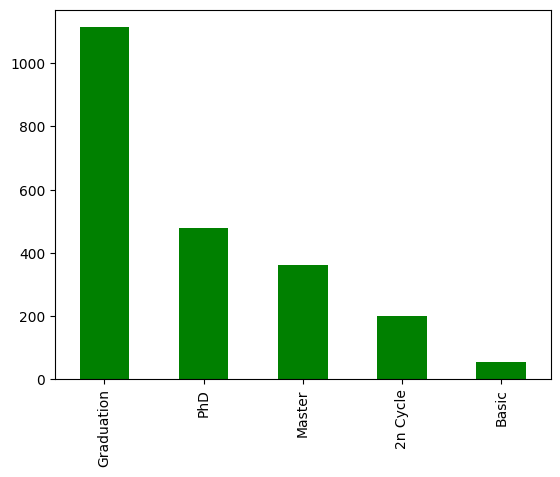

In [19]:
df['Education'].value_counts().plot(kind='bar',color='g')
plt.show()

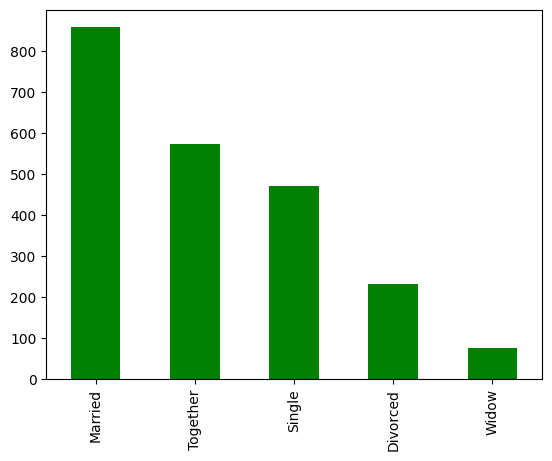

In [20]:
df['Marital_Status'].value_counts().plot(kind='bar',color='g')
plt.show()

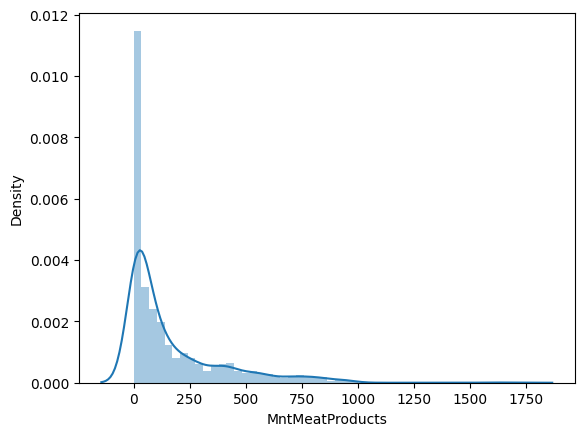

In [21]:
sns.distplot(df['MntMeatProducts'],hist = True)
plt.show()

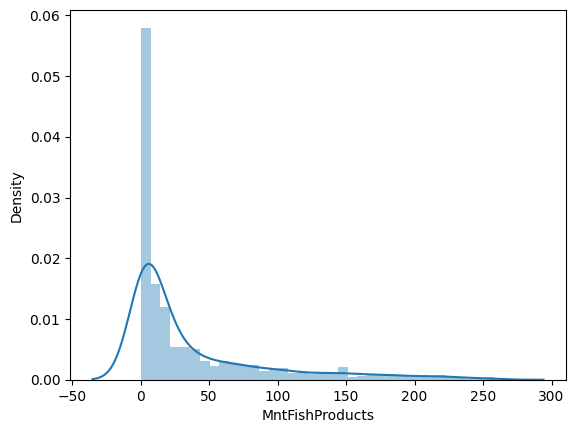

In [22]:
sns.distplot(df['MntFishProducts'],hist = True)
plt.show()

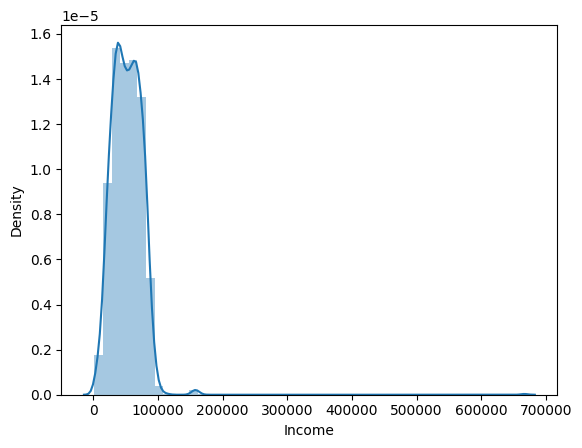

In [23]:
sns.distplot(df['Income'],hist = True)
plt.show()

<Axes: xlabel='Income'>

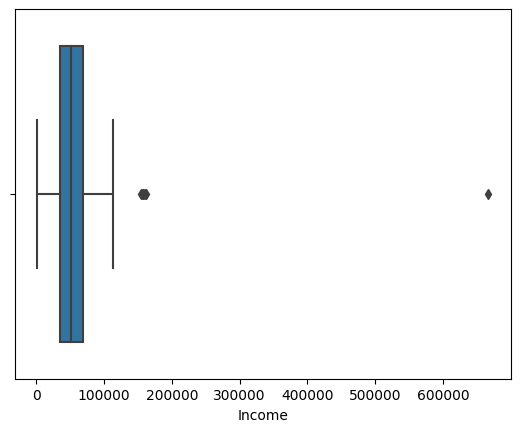

In [24]:
sns.boxplot(x = df['Income'])

In [25]:
iqr_value = df['Income'].quantile(0.75) - df['Income'].quantile(0.25)

MntMeatProducts_outliers = (df['Income'] < df['Income'].quantile(0.25) - 1.5 * iqr_value) | (df['Income'] > df['Income'].quantile(0.75) + 1.5 * iqr_value)
df.loc[MntMeatProducts_outliers, 'Income'] = iqr_value

<Axes: xlabel='Income'>

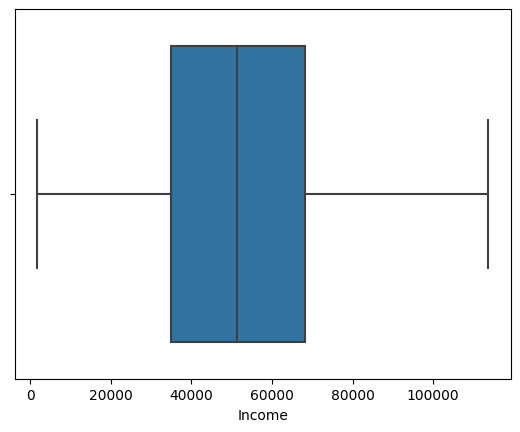

In [26]:
sns.boxplot(x = df['Income'])

<Axes: xlabel='Recency'>

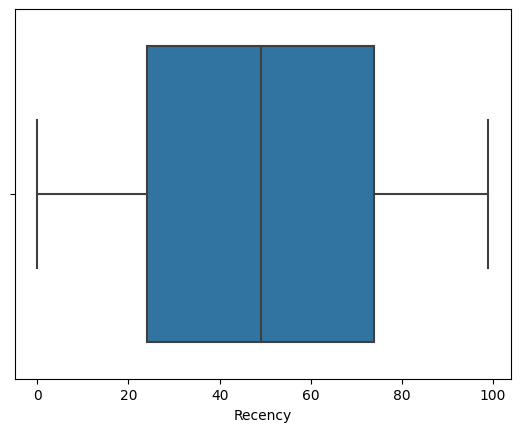

In [27]:
sns.boxplot(x = df['Recency'])

<Axes: xlabel='Age'>

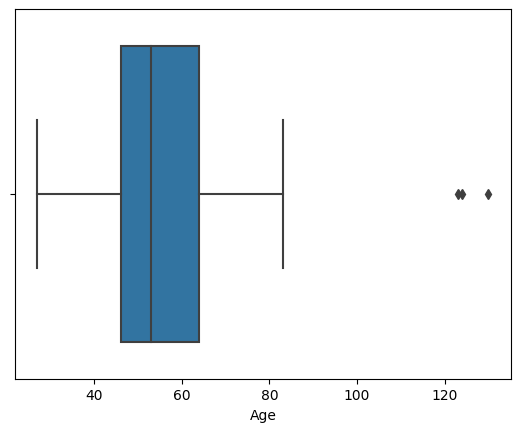

In [28]:
sns.boxplot(x = df['Age'])

In [29]:
Q1 = np.percentile(df['Age'], 25)
Q3 = np.percentile(df['Age'], 75)
IQR = Q3 - Q1
df = df[(df["Age"]>=Q1- 1.5*IQR) & (df["Age"]<=Q3+ 1.5*IQR)]

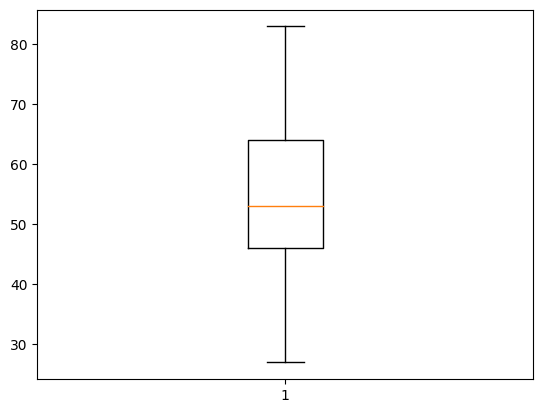

In [30]:
plt.boxplot(df["Age"])
plt.show()

## Bivariate Analysis

<Axes: xlabel='Income', ylabel='Education'>

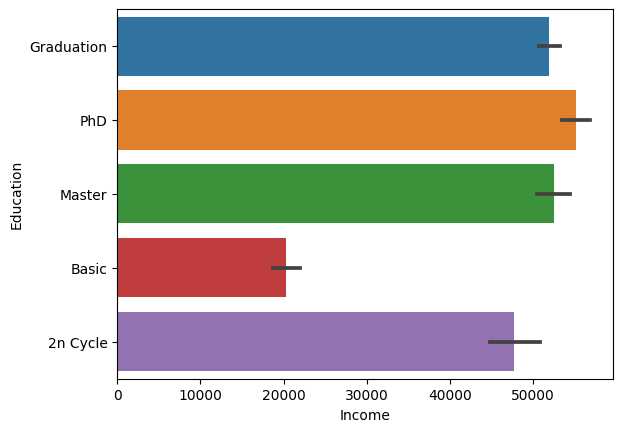

In [31]:
sns.barplot(x='Income', y="Education",  data=df)

<Axes: xlabel='Education', ylabel='Income'>

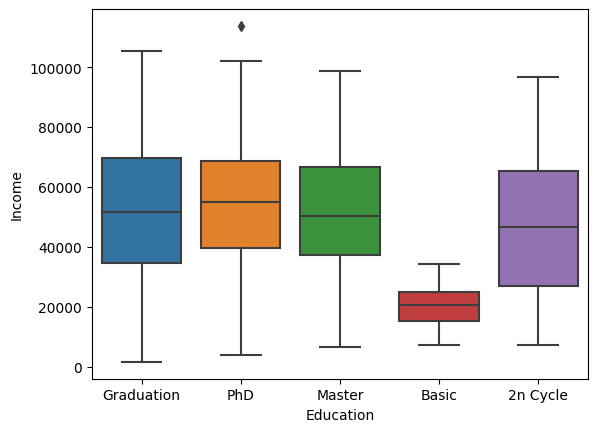

In [32]:
sns.boxplot(x=df.Education, y=df.Income)

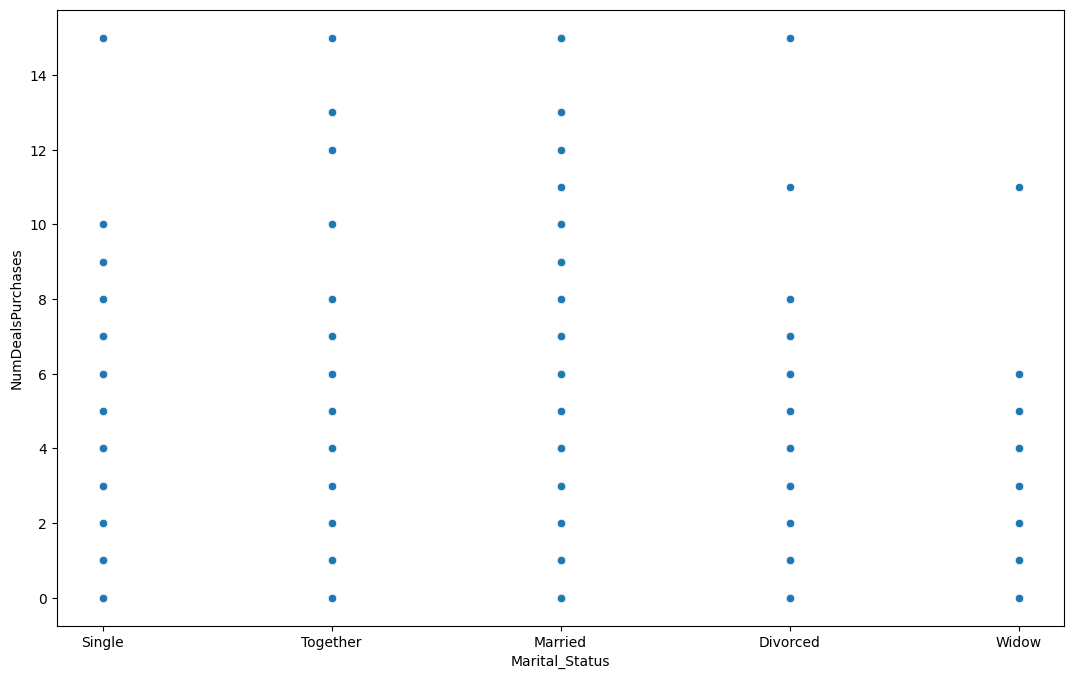

In [33]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Marital_Status'], y=df['NumDealsPurchases']);

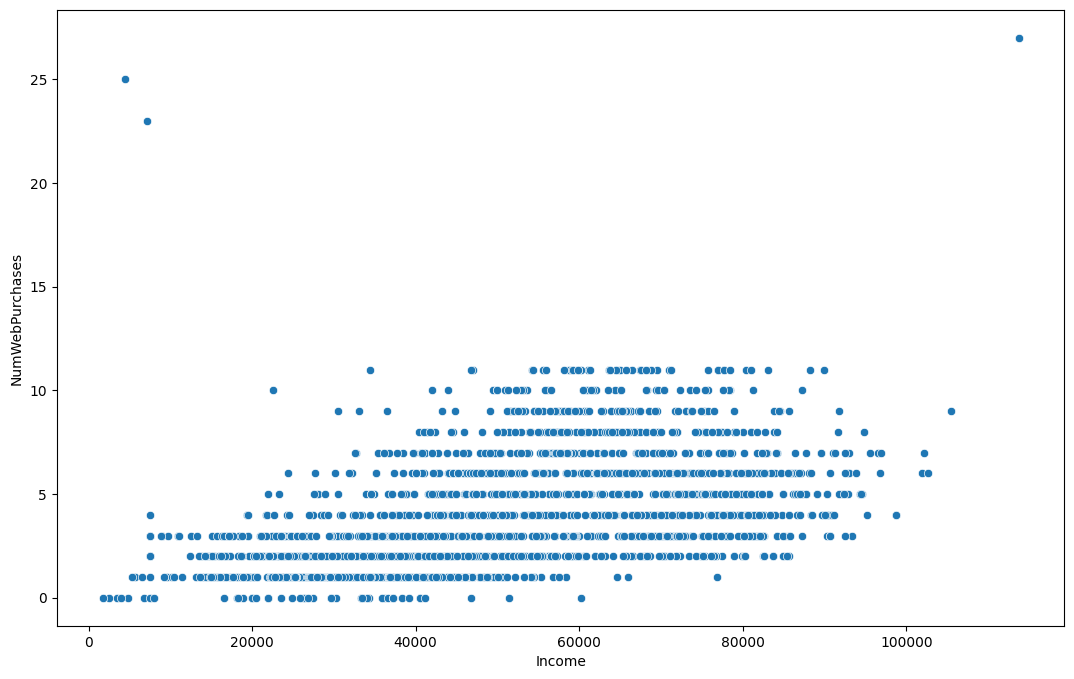

In [34]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Income'], y=df['NumWebPurchases']);

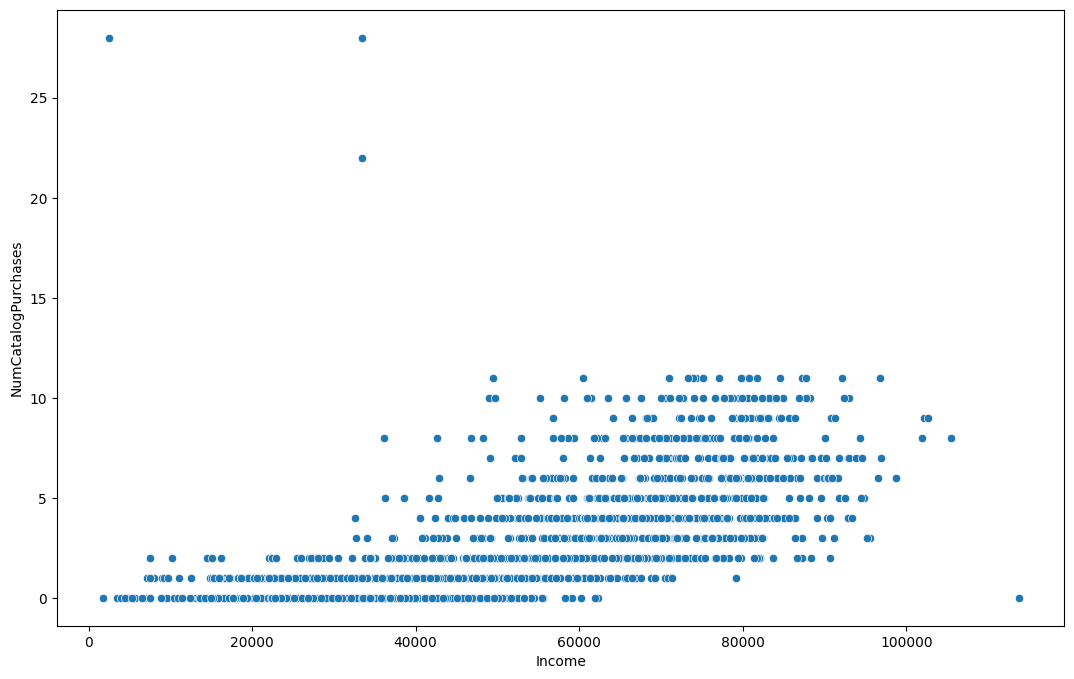

In [35]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Income'], y=df['NumCatalogPurchases']);

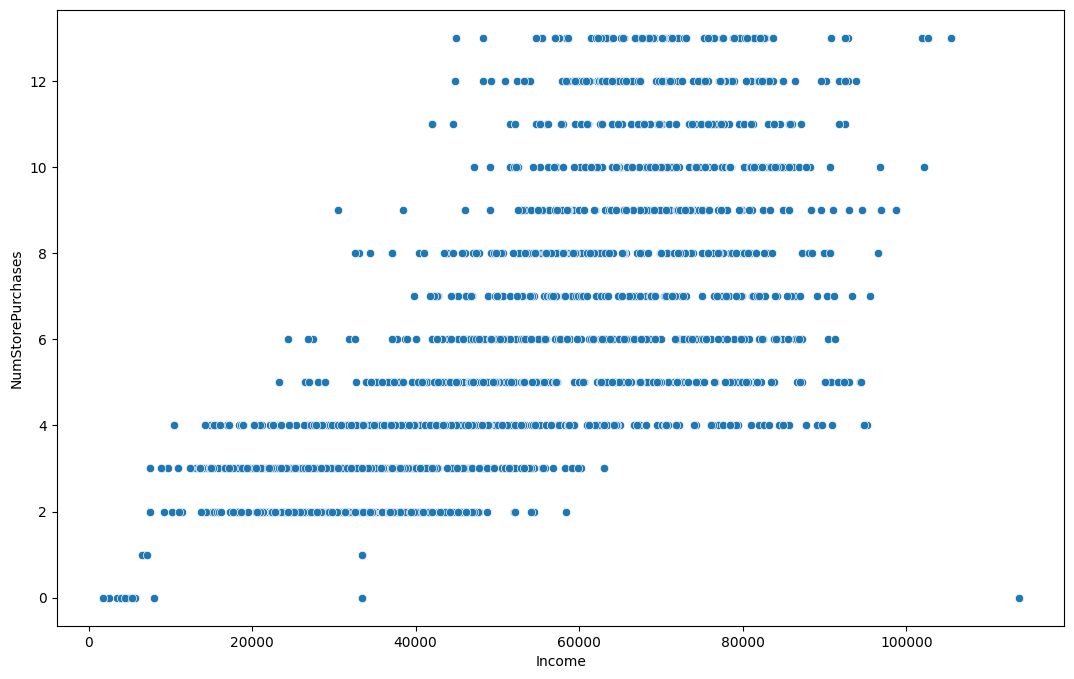

In [36]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Income'], y=df['NumStorePurchases']);

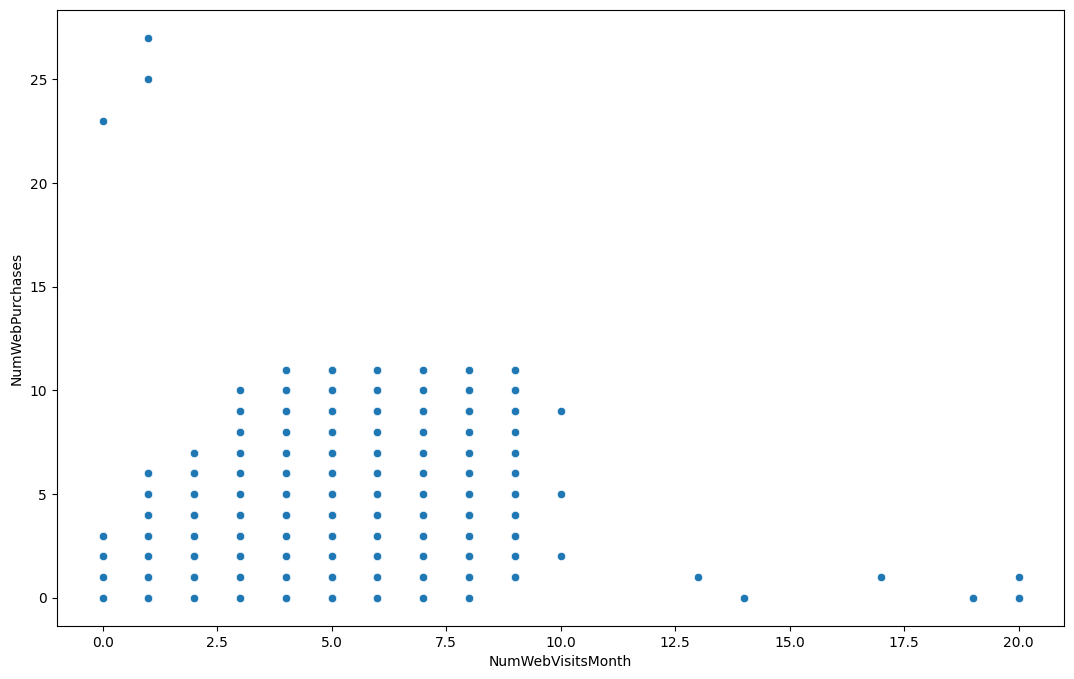

In [37]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['NumWebVisitsMonth'], y=df['NumWebPurchases']);

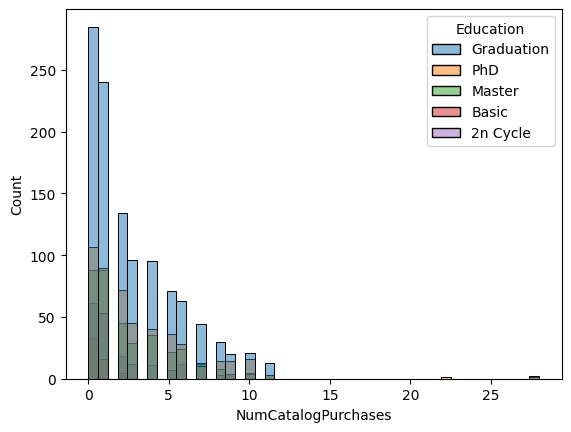

In [38]:
sns.histplot(x=df['NumCatalogPurchases'], hue=df['Education']);

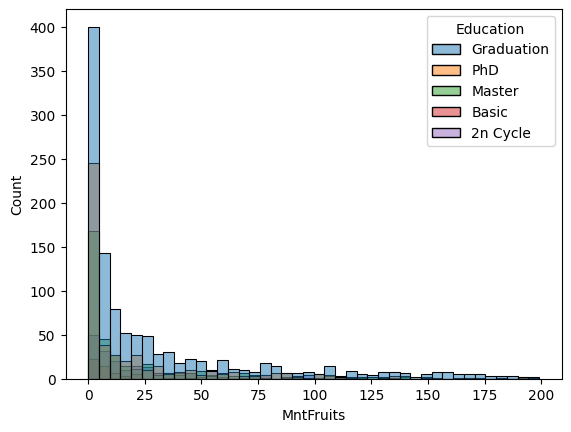

In [39]:
sns.histplot(x=df['MntFruits'], hue=df['Education']);

## Multivariate Analysis

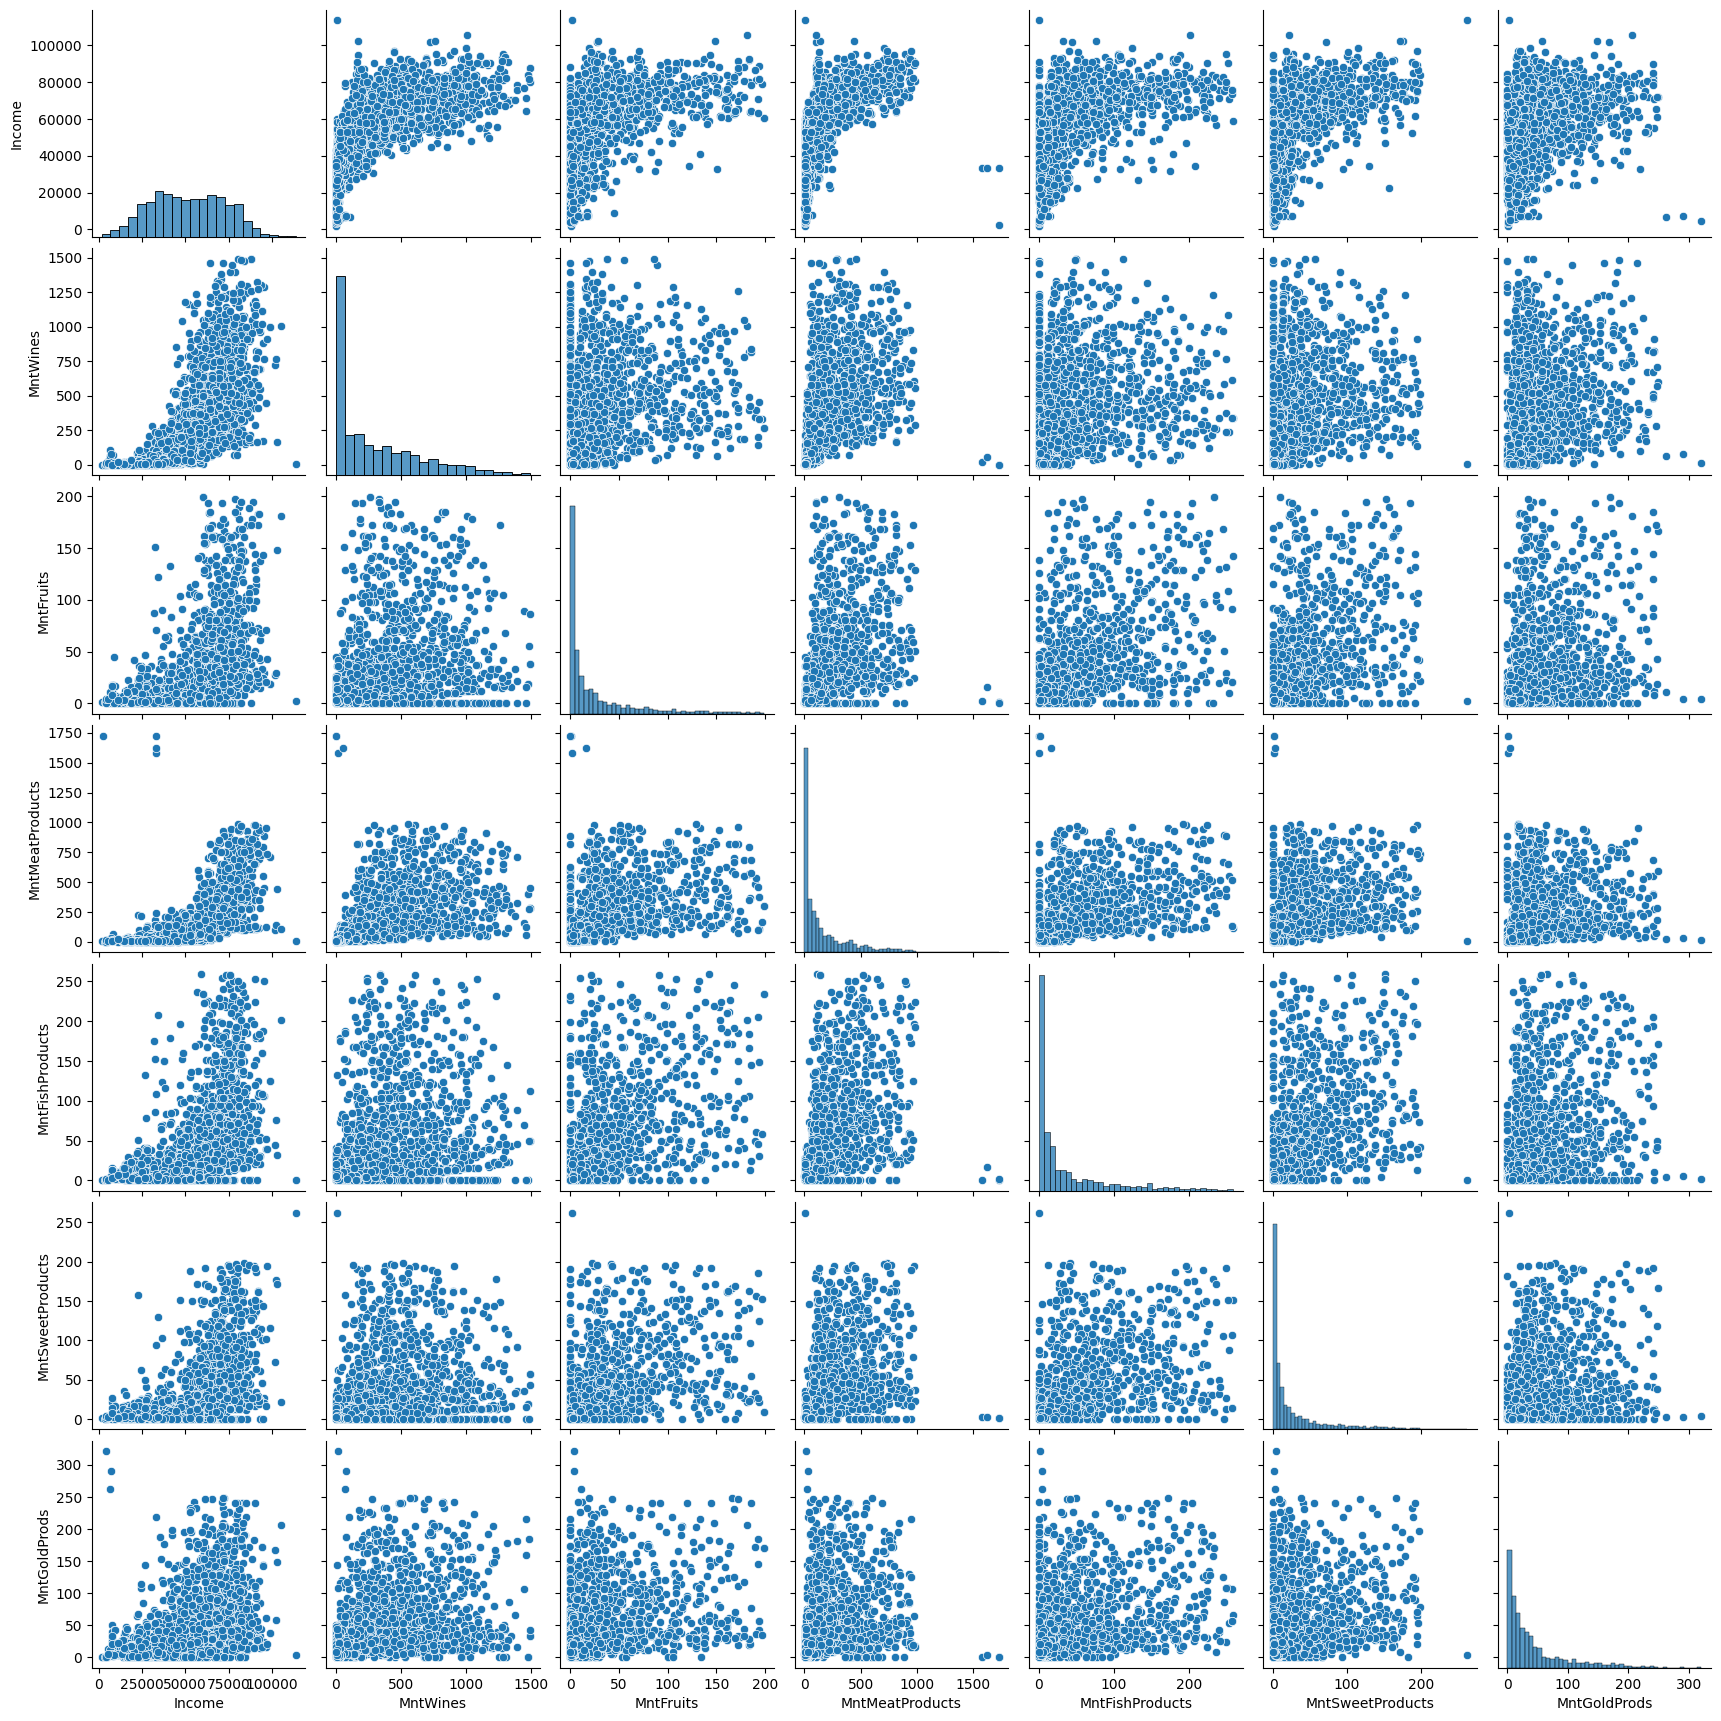

In [40]:
sns.pairplot(df, vars = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], palette = 'husl')
plt.show()

<Axes: >

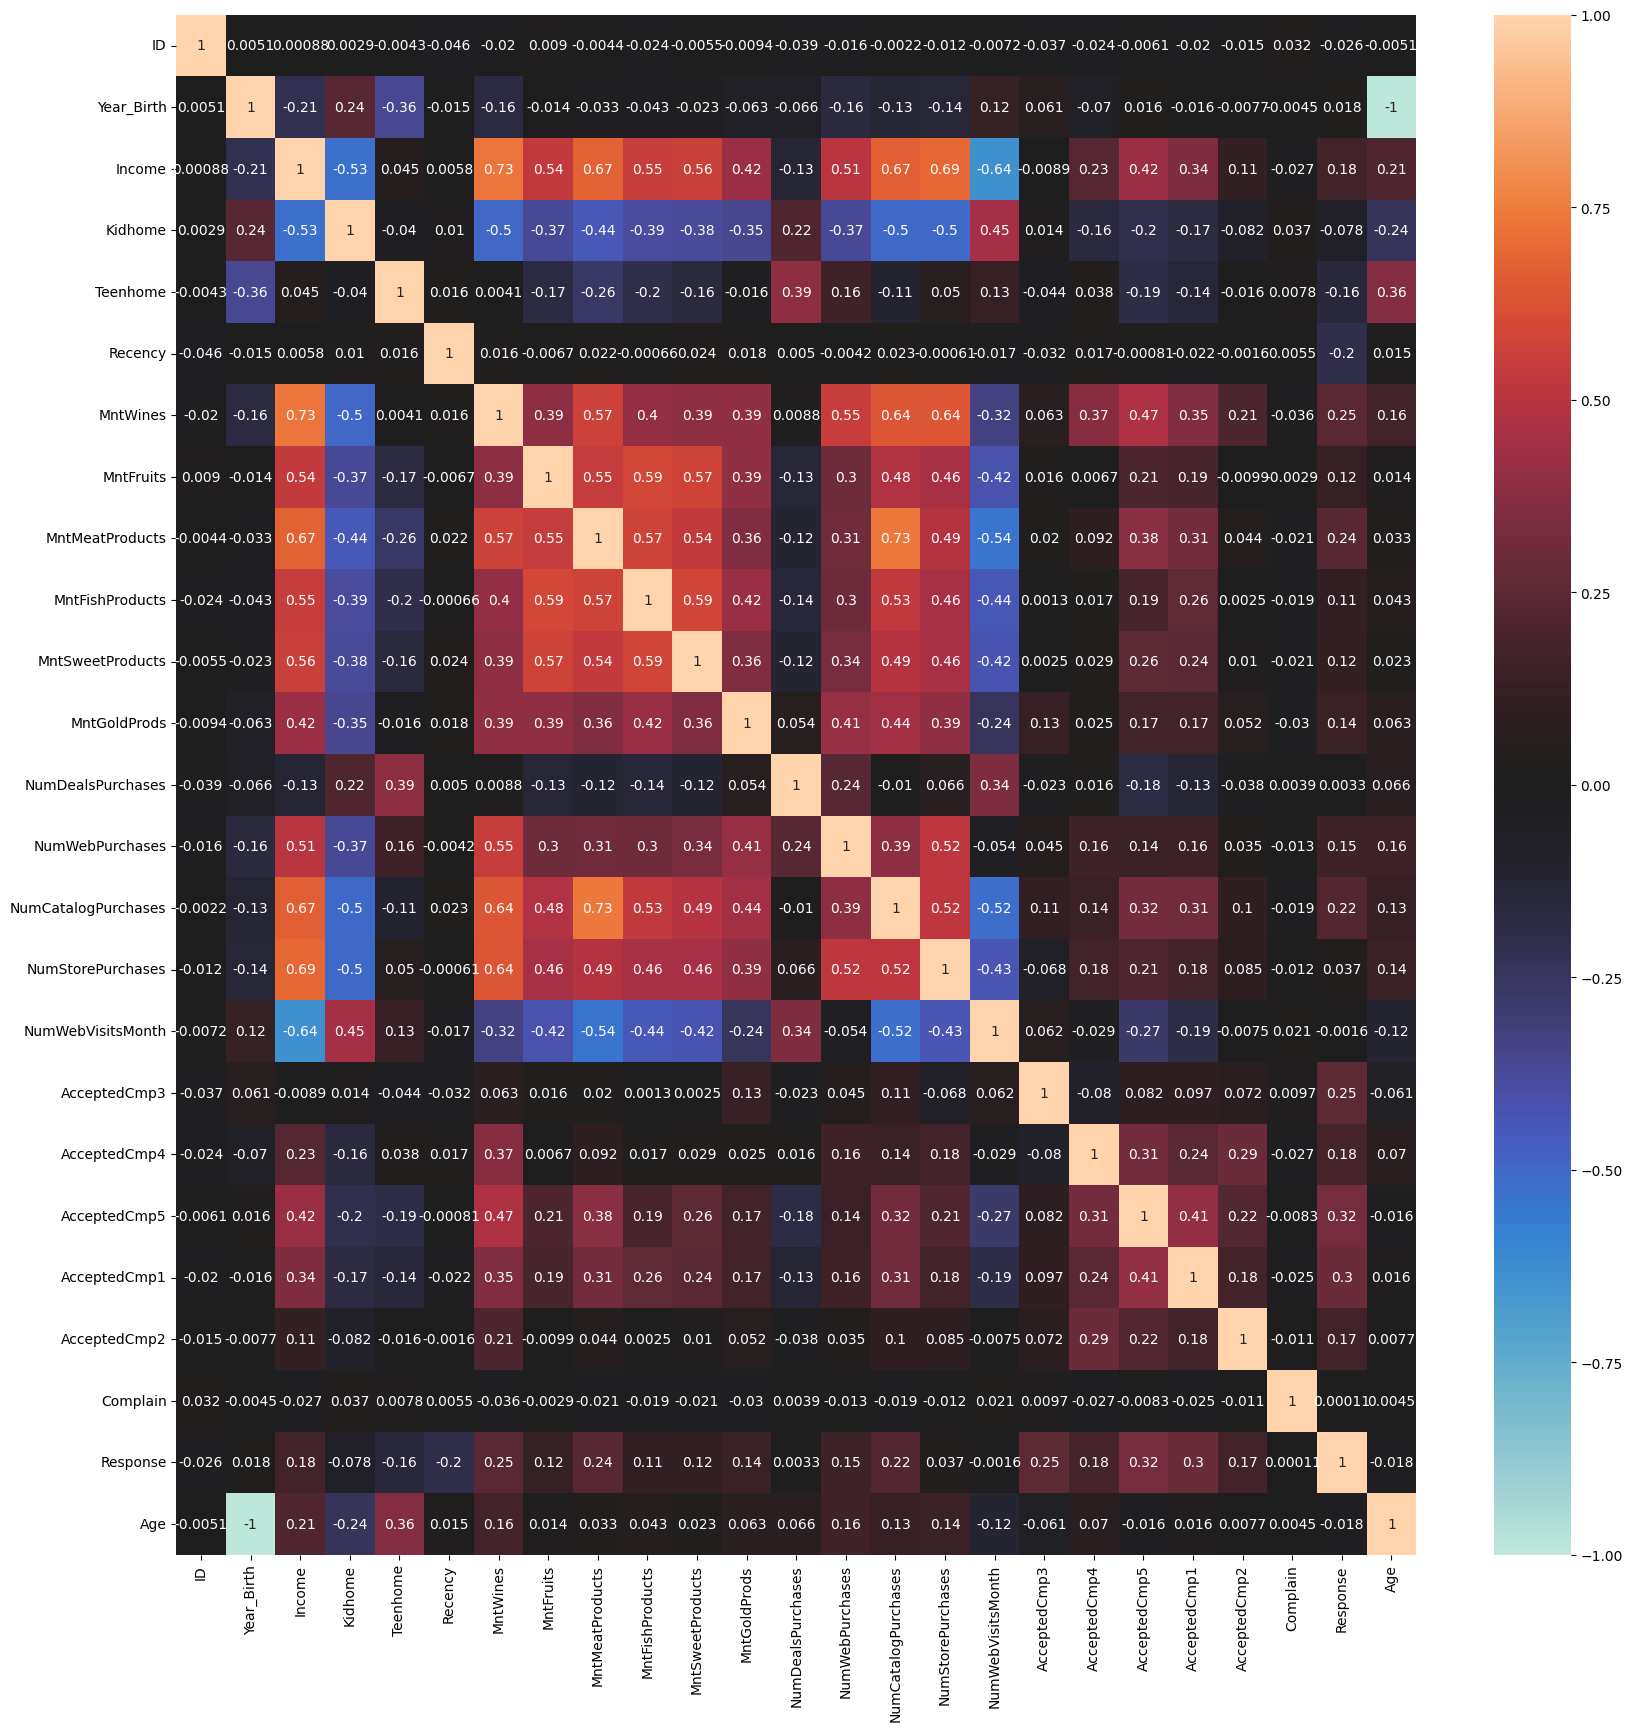

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap=None, center=0)

## Feature Engineering

In [42]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [43]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [44]:
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [45]:
df['Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [46]:
 df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner' , 'Widow':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [47]:
df['NumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [48]:
cols_to_drop = ['ID','Year_Birth','Kidhome','Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth','AcceptedCmp1','Response', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']
df = df.drop(cols_to_drop, axis=1)

In [49]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Age,Expenses,Children,Campaign,NumPurchases
0,Graduate,Alone,58138.0,58,0,66,1617,0,0,32
1,Graduate,Alone,46344.0,38,0,69,27,2,0,11
2,Graduate,Partner,71613.0,26,0,58,776,0,0,25
3,Graduate,Partner,26646.0,26,0,39,53,1,0,14
4,Postgraduate,Partner,58293.0,94,0,42,422,1,0,24


In [50]:
df.shape

(2206, 10)

# Data Transformation

In [51]:
from sklearn.preprocessing import LabelEncoder
cols = ["Education","Marital_Status"]
LE = LabelEncoder()
df[cols] = df[cols].apply(LE.fit_transform)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])

In [53]:
df.head(2)

,Education,Marital_Status,Income,Recency,Complain,Age,Expenses,Children,Campaign,NumPurchases
0,-0.891975,-1.356143,0.317999,0.308581,-0.095651,1.018025,1.675276,-1.264738,-0.438563,1.620037
1,-0.891975,-1.356143,-0.251349,-0.382621,-0.095651,1.274615,-0.962388,1.405130,-0.438563,-1.264387


# Hierarchical Clustering

In [54]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

### Single linkage

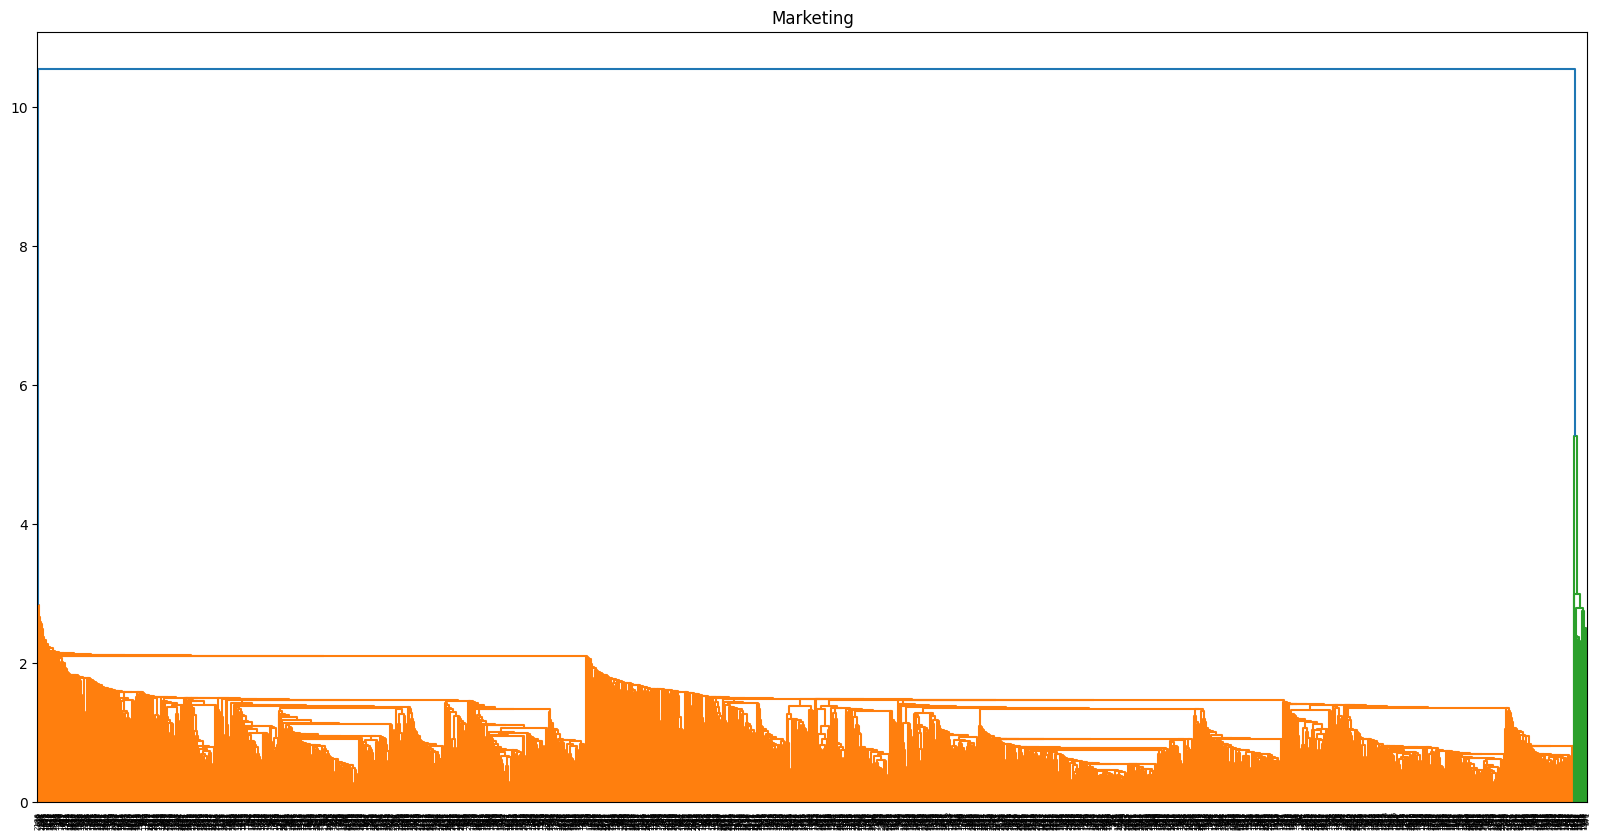

In [55]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df,method = 'single'))
plt.show()

### Complete linkage

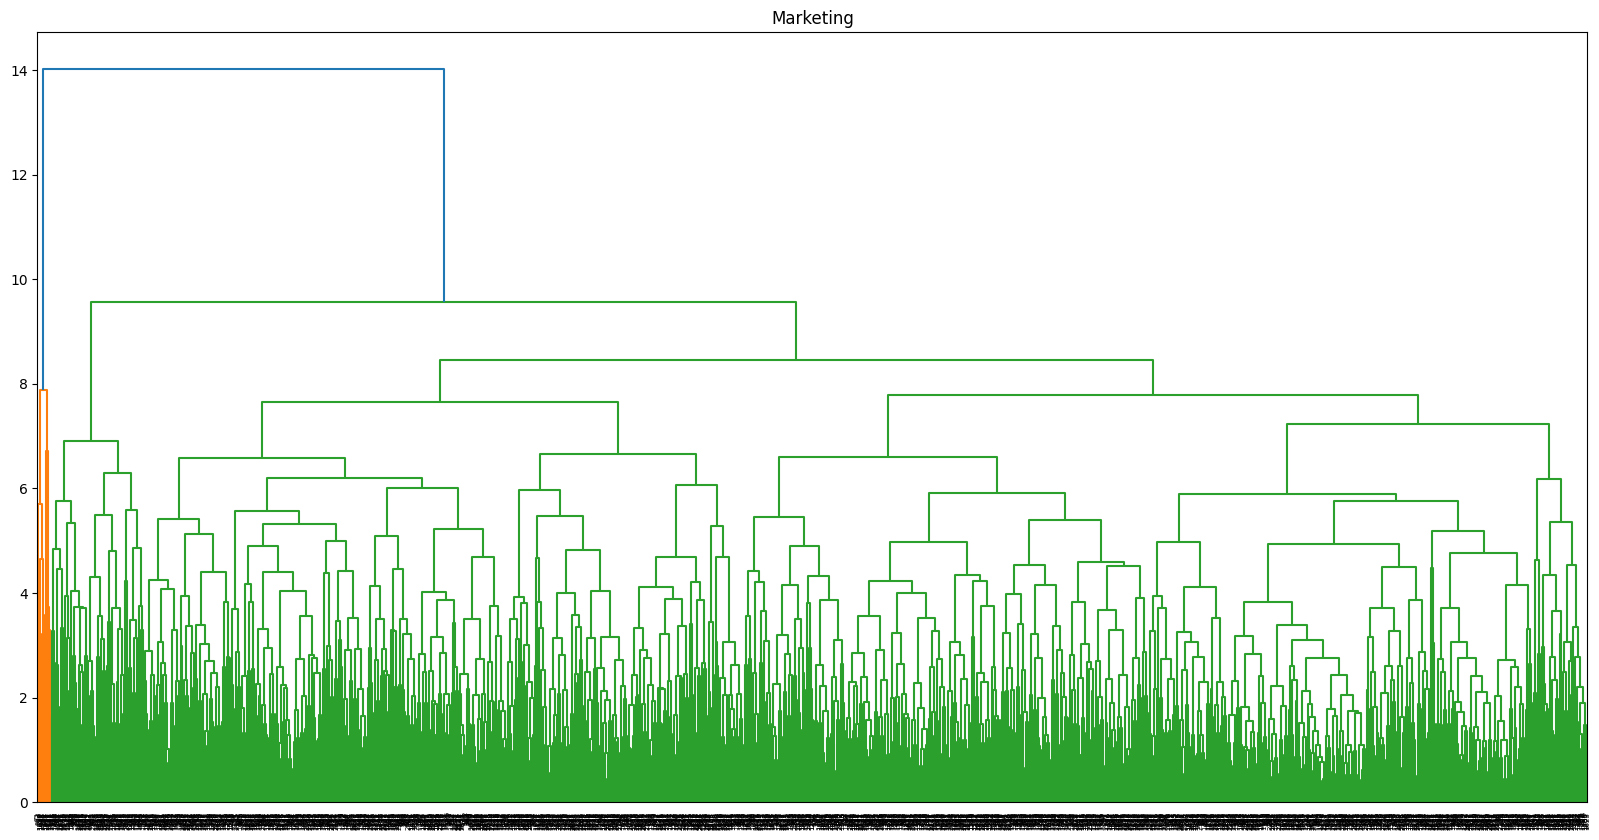

In [56]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df, method='complete'))
plt.show()

### Ward linkage

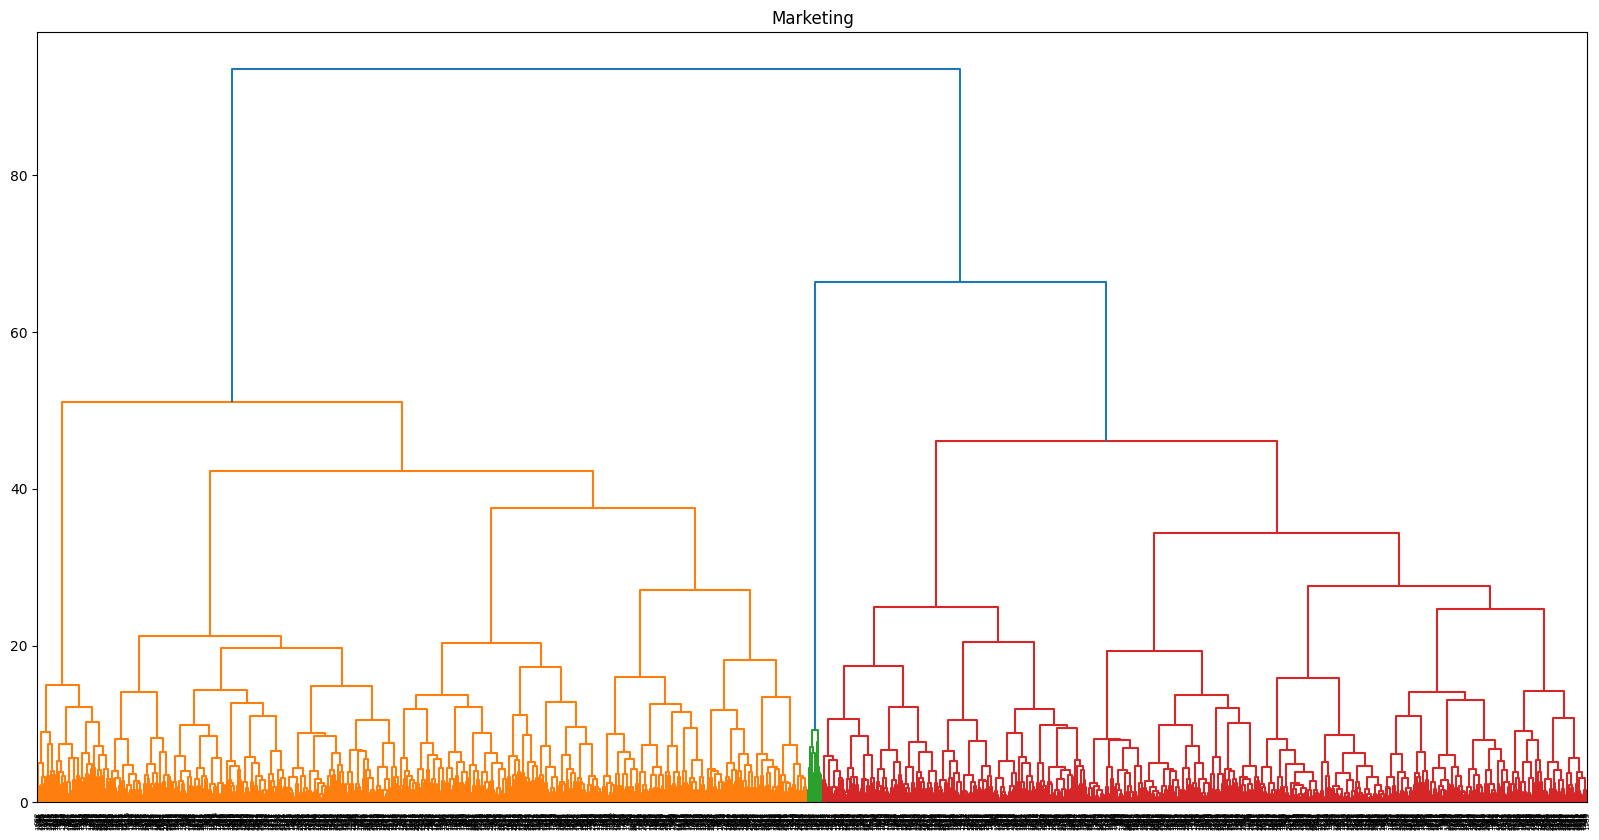

In [57]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.show()
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage="ward")

### Average linkage

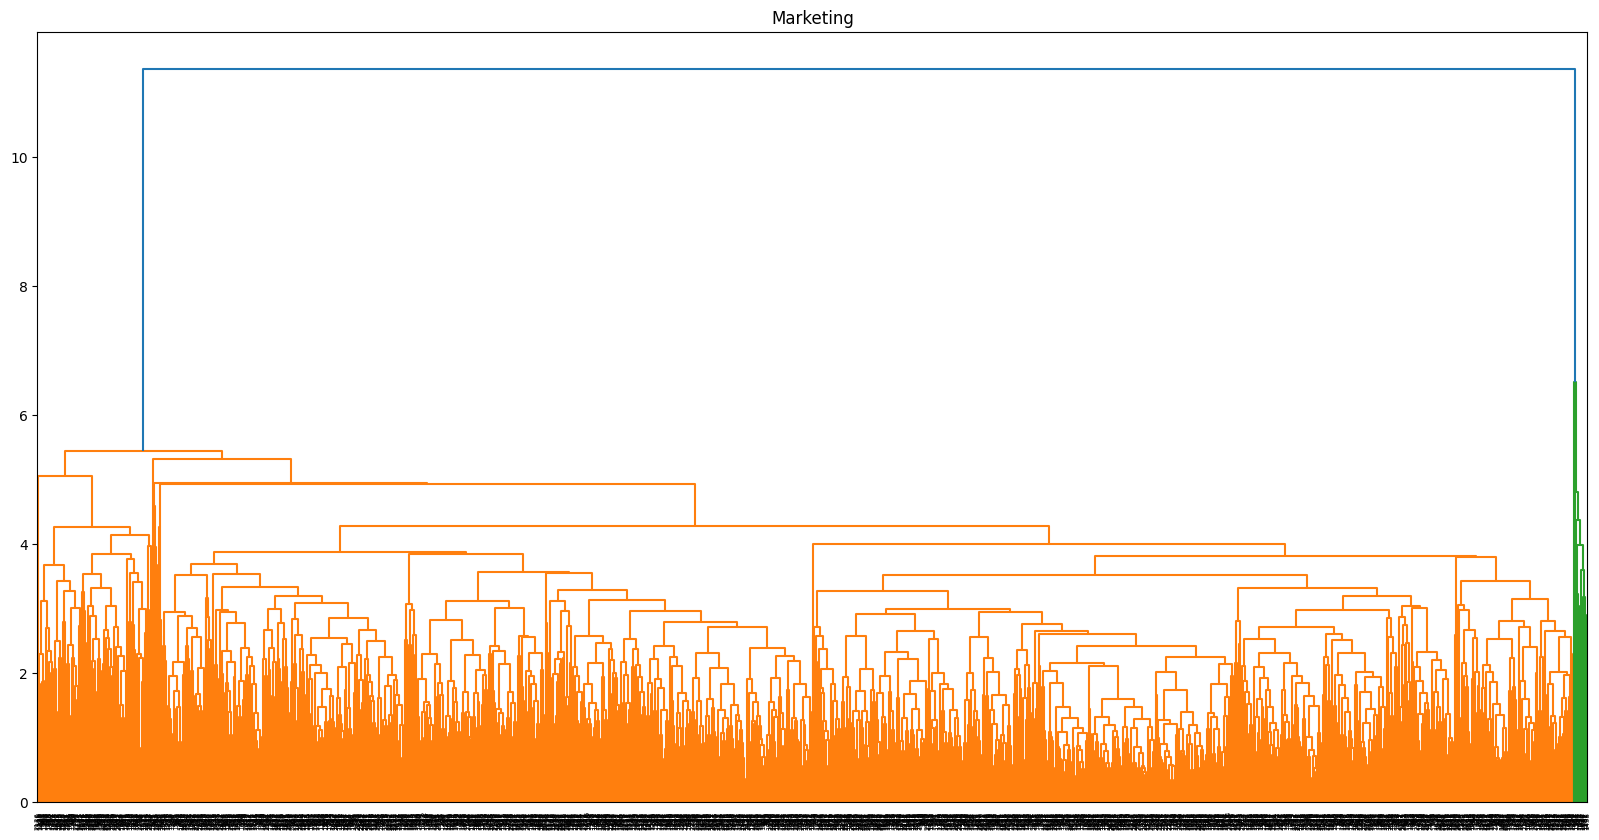

In [58]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df, method='average'))
plt.show()

### Centroid linkage

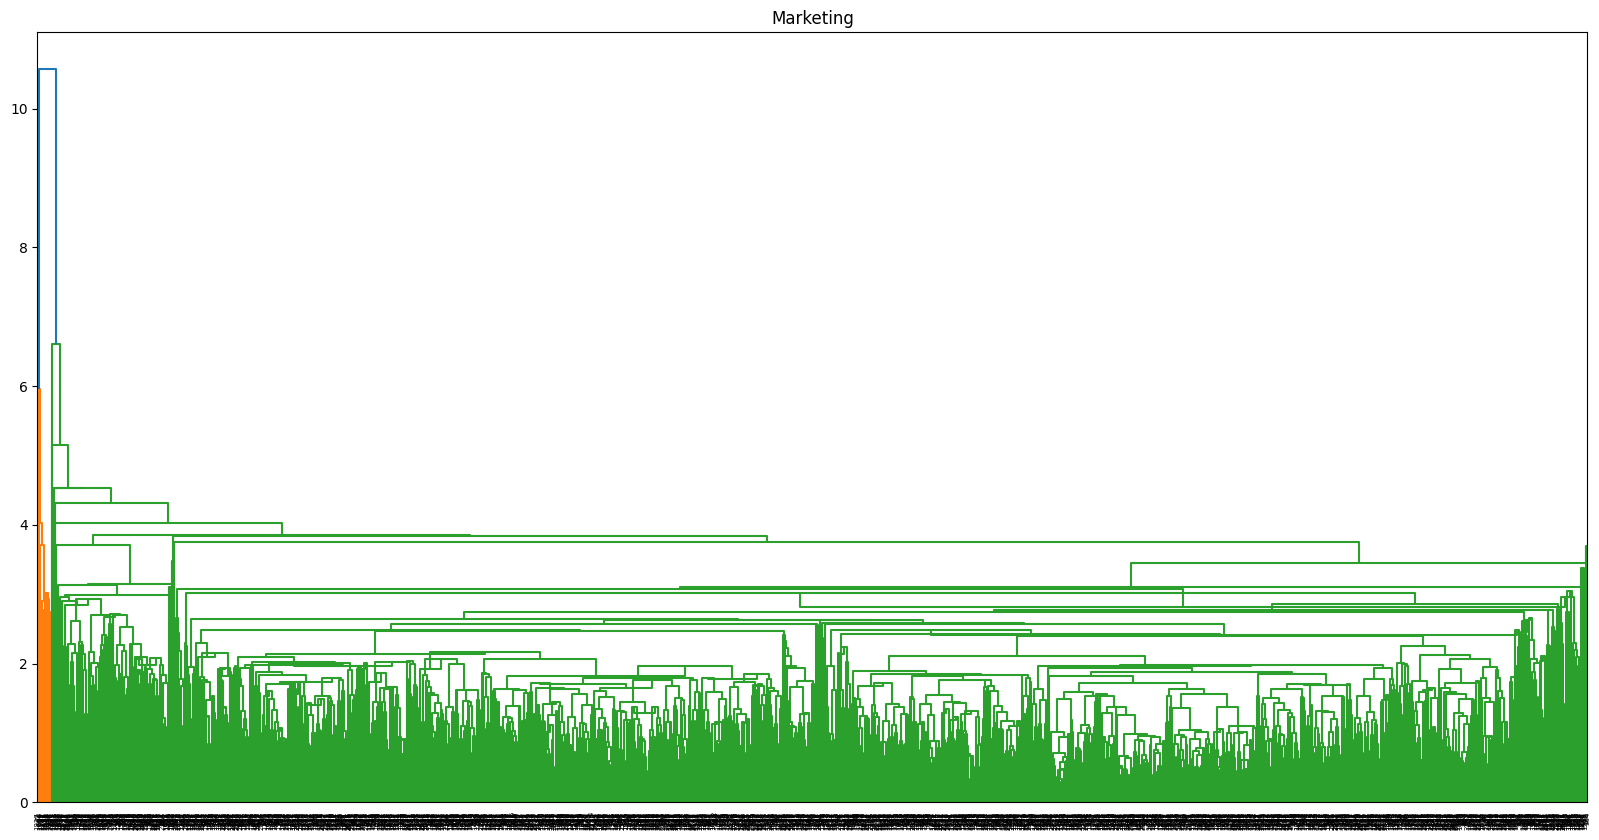

In [59]:
plt.figure(figsize = (20,10))
plt.title('Marketing')
dend = shc.dendrogram(shc.linkage(df, method='centroid'))
plt.show()

In [60]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Y = cluster.fit_predict(df)
Y = pd.DataFrame(Y)
Y.value_counts()

0    992
1    712
4    377
3    105
2     20
dtype: int64

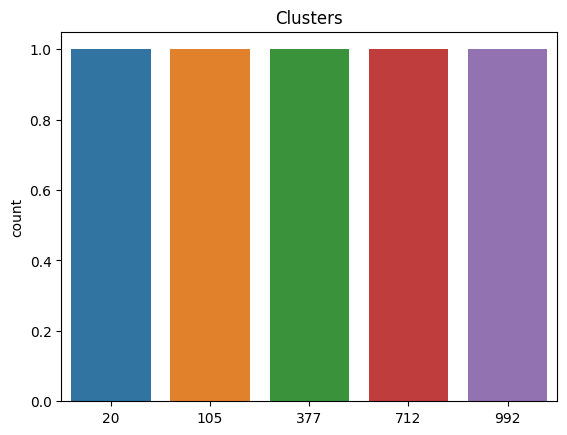

In [61]:
fig = sns.countplot(x=Y.value_counts())
fig.set_title("Clusters")
plt.show()

In [62]:
labels = cluster.labels_
labels

array([0, 4, 0, ..., 0, 0, 1])

In [63]:
from sklearn.metrics import silhouette_score

In [64]:
score = silhouette_score(df, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.14697906581072814


# KMeans

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [66]:
kmeans = kmeans.fit(df)

In [67]:
K = kmeans.predict(df)

In [68]:
K = pd.DataFrame(K)
K.value_counts()

2    1118
1     829
0     239
3      20
dtype: int64

In [69]:
p1 = kmeans.inertia_
print(p1)

13619.064219597516


In [70]:
clust = []
silhouette_scores = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    clust.append(int(kmeans.inertia_))
    labels = kmeans.labels_
    silhouette = silhouette_score(df, labels)
    silhouette_scores.append(silhouette)


print(clust)

[17270, 15776, 13859, 12480, 11657, 10974, 10347, 9863]


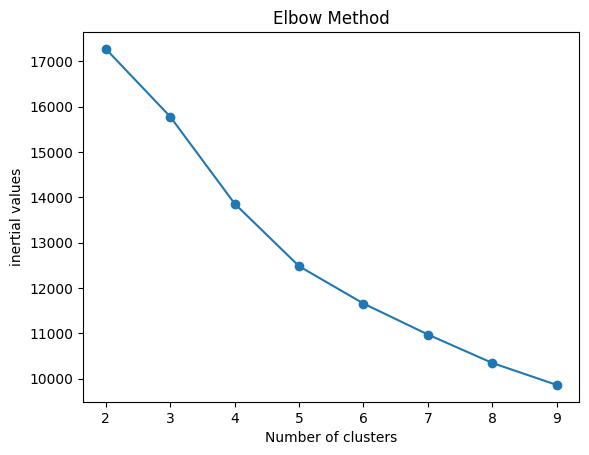

In [71]:
plt.plot(range(2,10), clust,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

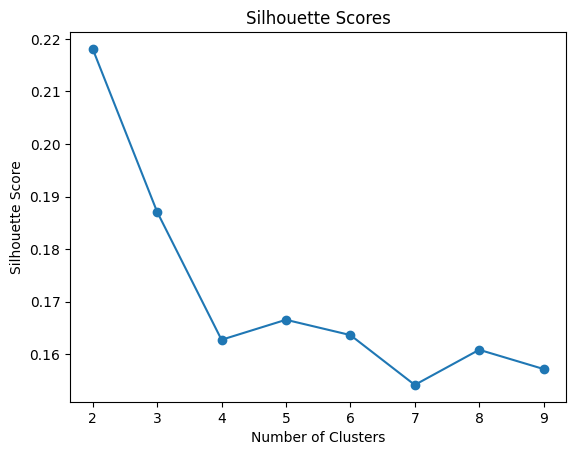

In [72]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

In [73]:
kmeans = KMeans(n_clusters=5)

In [74]:
kmeans = kmeans.fit(df)

In [75]:
K = kmeans.predict(df)
K

array([0, 3, 0, ..., 2, 0, 1], dtype=int32)

In [76]:
K = pd.DataFrame(K)
K.value_counts()

1    769
0    759
3    421
2    237
4     20
dtype: int64

In [77]:
Klabels = kmeans.labels_
kscore = silhouette_score(df, Klabels)
print("KMeans Silhouette Score:", kscore)

KMeans Silhouette Score: 0.1665796040981114


In [78]:
df['K_clusters']=K

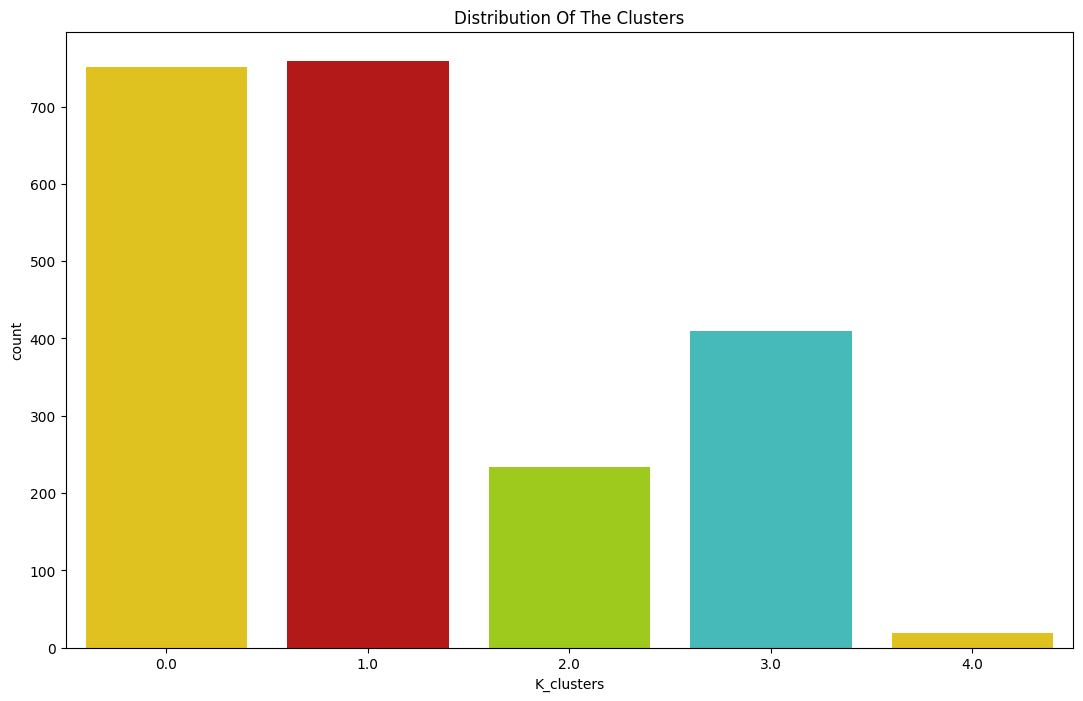

In [79]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=df['K_clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

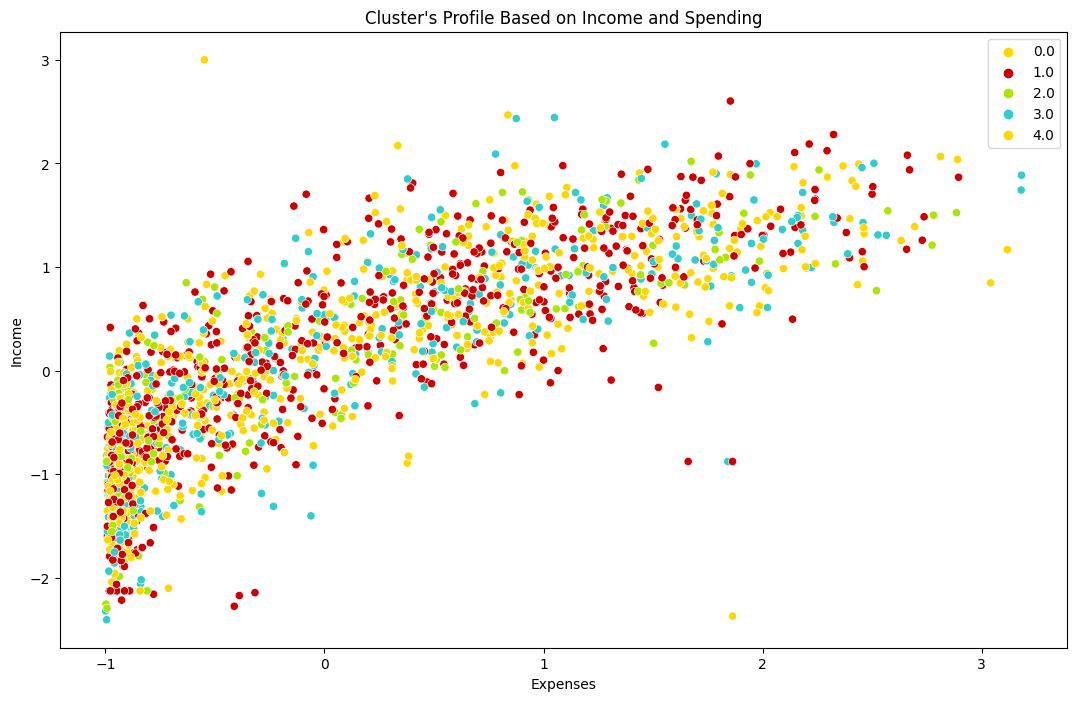

In [80]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=df, x=df['Expenses'], y=df['Income'], hue=df['K_clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

# DBSCAN

In [81]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [82]:
dbscan = DBSCAN(eps=5, min_samples=8)
dbscan.fit(df.iloc[:,0:10])

DBSCAN(eps=5, min_samples=8)

In [83]:
dblabels = dbscan.labels_

In [84]:
cl=pd.DataFrame(dblabels)
cl.value_counts()

 0    2186
 1      19
-1       1
dtype: int64

In [85]:
db_score = silhouette_score(df.iloc[:,0:10], labels)
print('The DBSCAN silhouette score is:',db_score)

The DBSCAN silhouette score is: 0.15721226670161922


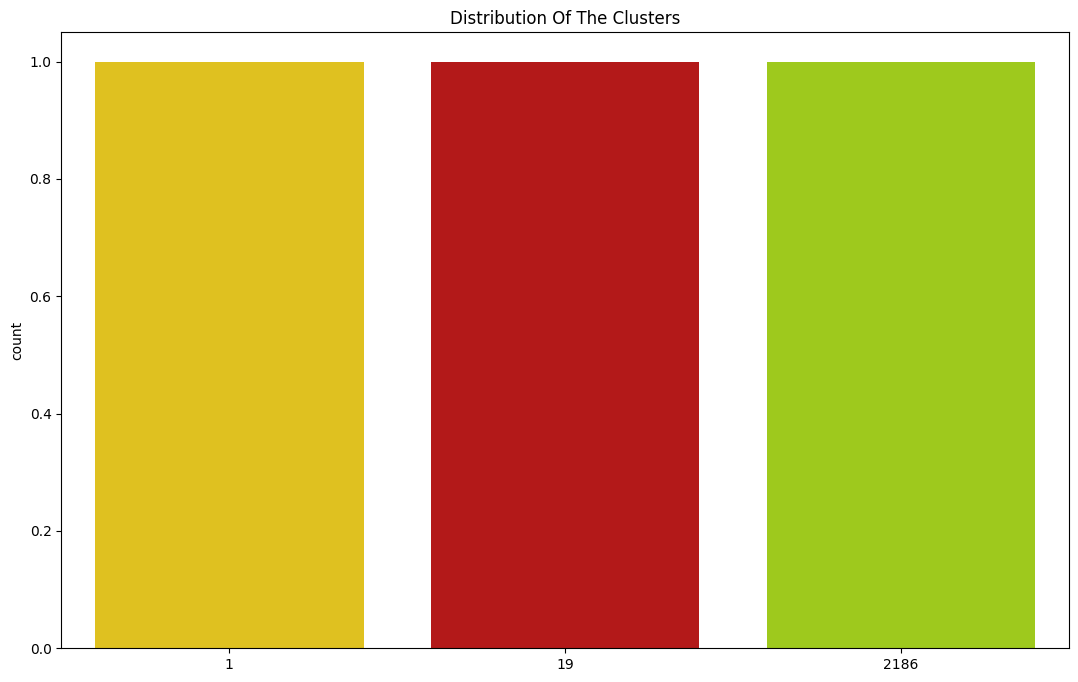

In [86]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x = cl.value_counts(), palette = pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

# Deployment

In [87]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Age,Expenses,Children,Campaign,NumPurchases,K_clusters
0,-0.891975,-1.356143,0.317999,0.308581,-0.095651,1.018025,1.675276,-1.264738,-0.438563,1.620037,0.0
1,-0.891975,-1.356143,-0.251349,-0.382621,-0.095651,1.274615,-0.962388,1.405130,-0.438563,-1.264387,3.0
2,-0.891975,0.737385,0.968496,-0.797341,-0.095651,0.333784,0.280134,-1.264738,-0.438563,0.658562,0.0
3,-0.891975,0.737385,-1.202258,-0.797341,-0.095651,-1.291287,-0.919256,0.070196,-0.438563,-0.852327,1.0
4,0.572085,0.737385,0.325481,1.552744,-0.095651,-1.034697,-0.307119,0.070196,-0.438563,0.521209,1.0


In [88]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(kmeans, pickle_out)
pickle_out.close()

In [91]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=f357e41f0c81f7dcc5d29747ca97079b641e1d60c5090f2a3888d3f5a3cd91c9
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [92]:
import pickle
import streamlit as st

In [93]:
# loading the trained model
pickle_in = open('classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)

#@st.cache()

In [94]:
def prediction(Education,Marital_Status,Income,Recency,Complain,Age,Expenses,Children,Campaign,NumPurchases):

    # Pre-processing user input
    # Education details

    if Education == "Undergraduate":
        Education = 0

    elif Education == "Graduate":
        Education = 1

    elif Education == "Postgraduate":
        Education = 2

    # Marital_Status
    if Marital_Status == "Single":
        Marital_Status = 0

    elif Marital_Status == "Relationship":
        Marital_Status = 1

    # Complains
    if Complain == "YES":
        Complain = 1

    elif Complain == "NO":
        Complain = 0

    prediction = classifier.predict([[Education,Marital_Status,Income,Recency,Complain,Age,Expenses,Children,Campaign,NumPurchases]])

    if prediction == 0:
        pred = 'cluster 2'

    elif prediction == 1:
        pred = 'cluster 1'

    elif prediction == 2:
        pred = 'cluster 4'

    elif prediction == 3:
        pred = 'cluster 3'

    elif prediction == 4:
        pred = 'cluster 5'

    return pred


In [95]:
# this is the main function in which we define our webpage
def main():
    # front end elements of the web page
    html_temp = """
    <div style ="background-color:Orange;padding:13px">
    <h1 style ="color:black;text-align:center;">Model Deployment</h1>
    </div>
    """

    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True)

    # following lines create boxes in which user can enter data required to make prediction

    Education = st.selectbox("Education",("Undergraduate","Graduate","Postgraduate"))

    Marital_Status = st.radio("Marital_Status: ", ('Single', 'Relationship'))
    if (Marital_Status == 'Single'):
        st.success("Single")
    elif (Marital_Status == 'Relationship'):
        st.success("Relationship")


    Incomes = st.selectbox("Incomes",(min_value==25000, max_value==100000))

    Recency= st.slider("Last Purchase", 0, 100)
    st.text('Selected: {}'.format(Recency))

    Complain = st.selectbox("Complain",("YES","NO"))

    Age = st.slider("Your age", 0, 100)
    st.text('Selected: {}'.format(Recency))

    Expense = st.slider("Select Monthly Expense", 0, 3000)
    st.text('Selected: {}'.format(Expense))

    Children = st.slider("Children", 0, 3000)
    st.text('Selected: {}'.format(Expense))

    Campaign = st.selectbox("Campain accepted?",("YES","NO"))

    NumPurchases= st.slider("NUmber of Purchase Made", 0, 50)
    st.text('Selected: {}'.format(Purchases))


    result =""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(Education,Marital_Status,Income,Recency,Complain,Age,Expenses,Children,Campaign,NumPurchases)
        st.success('Common cluster is {}'.format(result))


if __name__=='__main__':
    main()

2023-08-02 04:29:47.999 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


NameError: ignored